In [15]:
import pandas as pd
import numpy as np
import datetime as datetime
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

In [16]:
DATE_AXIS = {'Jan  ': 'Jan', 'Feb  ': 'Feb', 'Mar  ': 'Mar', 'Apr  ': 'Apr', 'May  ': 'May', 'Jun  ': 'Jun',
             'July  ': 'Jul', 'Aug  ': 'Aug', 'Sep  ': 'Sep', 'Oct ': 'Oct', 'Nov': 'Nov', 'Dec': 'Dec'} 
def give_data(FILENAME, SHEET_WITH_DATA, columns):  #повертає pandas dataframe
    data = pd.read_excel(FILENAME, sheet_name=SHEET_WITH_DATA)
    data = data[columns] # є можливість вибрати для аналізу не всі колонки
    data['Month'].replace(list(DATE_AXIS.keys()),
                          list(map(lambda x: datetime.datetime.strptime(x + '2018', '%b%Y'), list(DATE_AXIS.values()))),
                          inplace=True)
    data.rename(columns={'Sales Units': 'Quantity', 'PRICE USD/UN.': 'PriceUSD'}, inplace=True)
    data = data[data['Brand'] != '<OT>']
    return data

In [31]:
df = give_data('rnd_contest_data.xlsx', "REF raw data", ['Source', 'Month', 'Brand', 'Model', 'ENERGY LABEL EU', 
                  'NOFROST SYSTEM','NET LTRS.', 'Sales Units', 'PRICE USD/UN.'])

In [23]:
#type(df)

pandas.core.frame.DataFrame

In [33]:
df = df[df['Source'] == 'Traditional Sales']
#df = df[df['Brand'] == 'SAMSUNG']
df = df[(df['ENERGY LABEL EU'] != 'UNKNOWN') & (df['NET LTRS.'] != 'unknown') & (df['NOFROST SYSTEM'] != 'UNKNOWN')]
mas_for_energy = {'B':1, 'A':2, 'A+':3, 'A++':4, 'A+++':5}
mas_for_system = {'YES':1, 'NO':0}
df['ENERGY LABEL EU'] = df['ENERGY LABEL EU'].apply(lambda x: mas_for_energy[x])
df['NOFROST SYSTEM'] = df['NOFROST SYSTEM'].apply(lambda x: mas_for_system[x])
df['NET LTRS.'] = df['NET LTRS.'].apply(lambda x: int(x))

In [20]:
df.shape

(12212, 9)

In [34]:
df.head()

,Source,Month,Brand,Model,ENERGY LABEL EU,NOFROST SYSTEM,NET LTRS.,Quantity,PriceUSD
0,Traditional Sales,2018-01-01,INDESIT,TIAA 14,3,0,245,581.000000,216.907888
1,Traditional Sales,2018-01-01,WHIRLPOOL,BSNF 9121 OX,3,1,349,526.000000,473.180393
2,Traditional Sales,2018-01-01,LG,GA-B429SECZ,4,1,302,521.400000,493.012902
3,Traditional Sales,2018-01-01,SAMSUNG,RB37J5000SA/UA,3,1,367,515.000000,576.874039
4,Traditional Sales,2018-01-01,SAMSUNG,RB37J5000EF/UA,3,1,367,496.966038,575.123206


In [35]:
df.describe()

,ENERGY LABEL EU,NOFROST SYSTEM,NET LTRS.,Quantity,PriceUSD
count,12212.000000,12212.000000,12212.000000,12212.000000,12212.000000
mean,3.213151,0.530052,320.491402,29.641647,556.523687
std,0.575634,0.499116,107.241699,81.504618,525.433285
min,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,3.000000,0.000000,273.000000,2.000000,307.147681
50%,3.000000,1.000000,315.000000,5.001241,441.910364
75%,4.000000,1.000000,360.000000,20.000000,624.721723
max,5.000000,1.000000,819.000000,1590.000000,10949.740541


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299DF5AE308>,
      dtype=object)

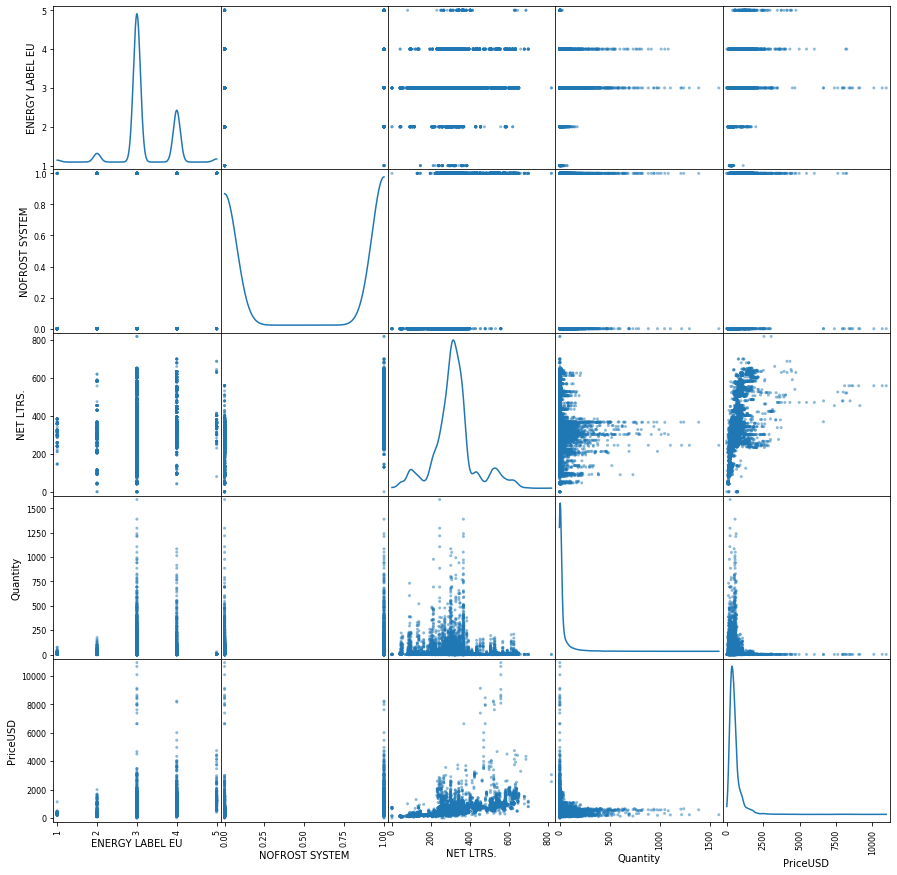

In [36]:
pd.plotting.scatter_matrix(df,figsize=(15, 15),diagonal='kde')

In [42]:
clust_d=df.drop([df.columns[0],df.columns[1],df.columns[2],df.columns[3]], axis=1)
clust_d

,ENERGY LABEL EU,NOFROST SYSTEM,NET LTRS.,Quantity,PriceUSD
0,3,0,245,581.000000,216.907888
1,3,1,349,526.000000,473.180393
2,4,1,302,521.400000,493.012902
3,3,1,367,515.000000,576.874039
4,3,1,367,496.966038,575.123206
...,...,...,...,...,...
20941,3,1,321,-1.000000,461.350709
20942,4,1,328,-1.000000,550.078825
20943,4,1,367,-1.000000,709.079608
20944,4,1,346,-1.000000,585.605562


In [45]:
digits_proj = TSNE(random_state=20150101).fit_transform(clust_d)

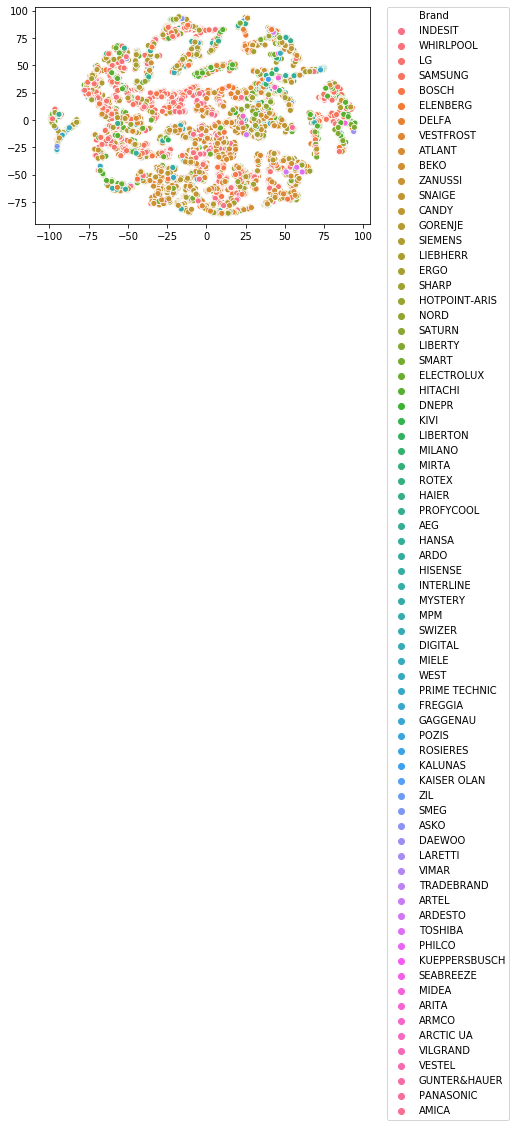

In [46]:
import seaborn as sns

sns.scatterplot(digits_proj[:,0], digits_proj[:,1], hue=df['Brand'], legend='full')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)